In [202]:
import numpy as np
from autograd import jacobian  #jf= jacobian(f)  
from typing import Tuple, List, Callable
#hacer el jacobiano de una funcion -> gradiente
#hacer el jacobiano del gradiente -> matriz hessiana
import numpy as np
from scipy.optimize import minimize_scalar

def f_ellipse(x: np.ndarray)-> float:
    return x[0]**2+12*x[1]**2

def g_ellipse(x: np.ndarray)-> np.ndarray:
    return np.array((2*x[0],24*x[1]))

def f_rosen(x: np.ndarray)-> float:
    return (1-x[0])**2+100.*(x[1]-x[0]**2)**2

g_rosen = jacobian(f_rosen)
def g_rosen0(x: np.ndarray)-> np.ndarray:
    return np.array((-2*(1-x[0])+200*(x[1]-x[0]**2)*(-2*x[0]),200*(x[1]-x[0]**2)))

def grad_desc(x: np.array, f: callable, gf: callable, lr_ini=0.01, lr_decr=0.999, maxiter=100, tol=0.001)-> Tuple[np.ndarray, List[np.ndarray], int]:
    '''
    Summary:
        Mediante el uso de el gradiente en el punto y un learning rate que comenzará a decrecer, hacemos varias iteraciones donde 
        descendemos en el sentido opuesto al gradiente del punto, que está multiplicado por el learning rate, obteniendo así un nuevo punto
        sobre el que volver a iterar. Nuestra condición para salirnos del bucle será cuando la norma del gradiente sea menor que la toleracia
        indicada o cuando hayamos superado el número máximo de iteraciones,devolviendo en ambos casos una tupla con el punto final al que hemos llegado, una
        lista de todos los puntos calculados y el número de iteraciones.Para un buen funcionamiento del algoritmo es clave elegir de forma
        óptima el lr de inicio y lr_decr para una progresión correcta.
        
    Args:
        -x(np.array):coordenadas del punto de inicio
        -f(callable):función en la que encontraremos el mínimo
        -gf(callable):gradiente de la función
        -lr_ini(float): learning rate inicial
        -lr_decr(float): razón usada para que el LR disminuya en cada iteración
        -maxiter(integer): número máximo de iteraciones, devolvemos el punto al que hemos llegado
        -tol: toleracia, saldremos del bucle una vez la norma del gradiente sea menor que este.
    Return:
        -(np.array(x, f(x)), evolucion_x, n_iter)  (np.array(float,float),[np.array(float,float)],integer)
        
            -np.array(x, f(x)):punto final al que ha llegado el algoritmo,aproximación del mínimo de la función
            -evolución_x:lista de los puntos que hemos ido calculando en cada iteración
            -n_iter: número de iteraciónes que se han hecho
'''
    n_iter = 0
    evolucion_x=[x]
    while np.linalg.norm(gf(x)) > tol and n_iter < maxiter:
        x = x - lr_ini*gf(x)
        evolucion_x.append(x)
        lr_ini *= lr_decr
        n_iter += 1
    
    return (np.array(x, f(x)), evolucion_x, n_iter)

a=np.array([0.0513,0.0347]) 
b = np.array([1,0])
        
#print(grad_desc(a,f_ellipse,g_ellipse))


def f_md(f: Callable, x: np.array, gx: np.array)-> Callable:
    # gx gradiente de f en x.
    def f_1d(t: float)-> float:
        return f(x - t*gx)
    return f_1d


def grad_desc_ls(x: np.array, f: Callable, gf: Callable, maxiter=100, tol=0.001, method ='brent')-> Tuple[np.ndarray, List [np.array], int]:
    '''
    Summary:
        Volvemos a hacer descenso por gradiente, pero esta vez con una búsqueda en línea usando mu (que reemplaza a la variable lr por la 
        que multiplicábamos el gradiente en la función anterior). Obtenemos mu gracias a minimize_scalar de scipy.optimize, que se encarga de
        encontrar el mínimo en f(x - t*gx) usando el método que le hayamos indicado, además de que coge la misma tolerancia y número máximo de iteraciones.
        Igual que en la anterior función, nuestra condición para salirnos del bucle será cuando la norma del gradiente sea menor que la toleracia
        indicada o cuando hayamos superado el número máximo de iteraciones, devolviendo en ambos casos una tupla con el punto final al que hemos llegado, una
        lista de todos los puntos calculados y el número de iteraciones
    Args:
        -x(np.array):coordenadas del punto de inicio
        -f(callable):función en la que encontraremos el mínimo
        -gf(callable):gradiente de la función
        -maxiter(integer): número máximo de iteraciones, devolvemos el punto al que hemos llegado
        -tol(float): toleracia, saldremos del bucle una vez la norma del gradiente sea menor que este.
        -method(str):método usado para la optimización que hace minimize_scalar
    Return:
        -(np.array(x, f(x)), evolucion_x, n_iter)  (np.array(float,float),[np.array(float,float)],integer)
        
            -np.array(x, f(x)):punto final al que ha llegado el algoritmo,aproximación del mínimo de la función
            -evolución_x:lista de los puntos que hemos ido calculando en cada iteración
            -n_iter: número de iteraciónes que se han hecho
'''
    n_iter = 0
    evolucion_x=[x]
    opt = {'maxiter': maxiter}
    while np.linalg.norm(gf(x)) > tol and n_iter < maxiter:
        mu = minimize_scalar(f_md(f, x, gf(x)),method=method, tol=0.001, options = opt)['x']
        #print(mu['x'])
        x = x - mu*gf(x)
        evolucion_x.append(x)
        n_iter += 1
    
    return (np.array(x, f(x)), evolucion_x, n_iter)

c=np.array([2.,2.])
print(grad_desc(c, f_rosen, g_rosen, lr_ini=0.0025))
print(grad_desc_ls(c,f_rosen,g_rosen, maxiter=1000))


(array([0.84184069, 0.7080008 ]), [array([2., 2.]), array([-2.005,  3.   ]), array([0.05311495, 3.50950249]), array([0.24372478, 1.75966677]), array([0.6606496 , 0.91208212]), array([0.97530553, 0.67521983]), array([0.70758628, 0.81253173]), array([0.9283821 , 0.65753826]), array([0.74034217, 0.75900269]), array([0.89652071, 0.65439524]), array([0.76433467, 0.7284029 ]), array([0.87461763, 0.65702294]), array([0.78187075, 0.7103988 ]), array([0.85948924, 0.66145153]), array([0.794628  , 0.69958739]), array([0.84904416, 0.66598451]), array([0.80387662, 0.69302143]), array([0.84186865, 0.66999116]), array([0.81057235, 0.68904023]), array([0.83698806, 0.67331956]), array([0.81542619, 0.68667792]), array([0.83372137, 0.67601442]), array([0.81896134, 0.68535455]), array([0.83158892, 0.67818566]), array([0.82155902, 0.684711  ]), array([0.83025163, 0.6799508 ]), array([0.82349457, 0.68451859]), array([0.82946964, 0.6814128 ]), array([0.82496526, 0.6846283 ]), array([0.82907359, 0.68265407]),

In [203]:
def h_rosen(x: np.ndarray)-> np.ndarray:
    return np.array([[2+800*x[0]-400*x[1], -400*x[0]],[-400*x[0], 200]])


def newton(x: np.array, f: Callable, gf: Callable, hf: Callable, lr=0.01, lr_decr=0.999, maxiter=100, tol=0.001)-> Tuple[np.ndarray, List[np.array], int]:
    '''
    Summary:
        En cada iteración, calculamos el hessiano y la inversa del hessiano para actualizar nuestra posición siguiendo el método de Newton: 
        x=x-lr⋅inversa_hessiano⋅gradiente . A medida que iteramos, nuestro learning rate decrece como en la función grad_desc y también 
        vamos guardando las coordenadas de los puntos que calculamos. Nuestra condición para salirnos del bucle será cuando la norma del gradiente sea menor que la toleracia
        indicada o cuando hayamos superado el número máximo de iteraciones, devolviendo en ambos casos una tupla con el punto final al que hemos llegado, una
        lista de todos los puntos calculados y el número de iteraciones.
    Args:
        -x(np.array):coordenadas del punto de inicio
        -f(callable):función en la que encontraremos el mínimo
        -gf(callable):gradiente de la función
        -hf(callable): hessiano , que viene a ser la matriz de segundas derivadas de la función
        -lr_ini(float): learning rate inicial
        -lr_decr(float): razón usada para que el LR disminuya en cada iteración
        -maxiter(integer): número máximo de iteraciones, devolvemos el punto al que hemos llegado
        -tol(float): toleracia, saldremos del bucle una vez la norma del gradiente sea menor que este.
    Return:
        -(np.array(x, f(x)), evolucion_x, n_iter)  (np.array(float,float),[np.array(float,float)],integer)
        
            -np.array(x, f(x)):punto final al que ha llegado el algoritmo,aproximación del mínimo de la función
            -evolución_x:lista de los puntos que hemos ido calculando en cada iteración
            -n_iter: número de iteraciónes que se han hecho
'''
    n_iter = 0
    evolucion_x=[x]
    gradiente = gf(x)
    while np.linalg.norm(gradiente) > tol and n_iter < maxiter:
        hessiano = hf(x)
        #print(hessiano)
        # Calcula la inversa del hessiano.
        inversa_hessiano = np.linalg.inv(hessiano)

        x = x - lr*inversa_hessiano.dot(gradiente)
        evolucion_x.append(x)
        lr *= lr_decr
        n_iter += 1
        gradiente = gf(x)

    return (np.array(x, f(x)), evolucion_x, n_iter)

def newton_ls(x: np.array, f: Callable, gf: Callable, hf: Callable, maxiter=100, tol=0.001, method ='brent')-> Tuple[np.ndarray , List[np.array], int]:
    '''
    Summary:
        Volvemos a seguir el método de Newton, pero vamos a volver a hacer una búsqueda del LR óptimo en cada punto con minimize_scalar. Esta última 
        recibe los mismos parámetros que cuando la usábamos en grad_desc_ls, solo que en vez del gradiente le pasamos la matriz inversa del 
        hessiano por el gradiente. Por tanto para obtener la posición de un punto en una iteración al punto de la interación anterior le restamos mu por 
        la matriz inversa del hessiano por el gradiente. Nuestra condición para salirnos del bucle será cuando la norma del gradiente sea menor que la toleracia
        indicada o cuando hayamos superado el número máximo de iteraciones, devolviendo en ambos casos una tupla con el punto final al que hemos llegado, una
        lista de todos los puntos calculados y el número de iteraciones.
    
    Args:
        -x(np.array):coordenadas del punto de inicio
        -f(callable):función en la que encontraremos el mínimo
        -gf(callable):gradiente de la función
        -maxiter(integer): número máximo de iteraciones, devolvemos el punto al que hemos llegado
        -tol(float): toleracia, saldremos del bucle una vez la norma del gradiente sea menor que este.
        -method(str):método usado para la optimización que hace minimize_scalar
    Return:
        -(np.array(x, f(x)), evolucion_x, n_iter)  (np.array(float,float),[np.array(float,float)],integer)
        
            -np.array(x, f(x)):punto final al que ha llegado el algoritmo,aproximación del mínimo de la función
            -evolución_x:lista de los puntos que hemos ido calculando en cada iteración 
            -n_iter: número de iteraciónes que se han hecho
    '''





    n_iter = 0
    evolucion_x=[x]
    gradiente = gf(x)
    while np.linalg.norm(gradiente) > tol and n_iter < maxiter:
        # Calcula la inversa del hessiano.
        inversa_hessiano = np.linalg.inv(hf(x))
        mu = minimize_scalar(f_md(f, x, inversa_hessiano.dot(gradiente)),method=method, tol=0.001, options={'maxiter':100})['x']
        x = x - mu*inversa_hessiano.dot(gradiente) 
        evolucion_x.append(x)
        n_iter += 1
        gradiente = gf(x)

    return (np.array(x, f(x)), evolucion_x, n_iter)

b = np.array([1.1,0.9])
print(newton(b,f_rosen,g_rosen, h_rosen))
print(newton_ls(b,f_rosen,g_rosen, h_rosen))

b = np.array([-0.5,2.])
print(newton(b,f_rosen,g_rosen, h_rosen))
print(newton_ls(b,f_rosen,g_rosen, h_rosen))

(array([1.10039004, 1.09176238]), [array([1.1, 0.9]), array([1.10000448, 0.90310987]), array([1.10000895, 0.90618563]), array([1.1000134 , 0.90922768]), array([1.10001784, 0.91223644]), array([1.10002226, 0.9152123 ]), array([1.10002666, 0.91815564]), array([1.10003105, 0.92106685]), array([1.10003542, 0.92394631]), array([1.10003977, 0.9267944 ]), array([1.10004411, 0.92961149]), array([1.10004844, 0.93239794]), array([1.10005275, 0.93515412]), array([1.10005705, 0.93788038]), array([1.10006133, 0.94057707]), array([1.1000656 , 0.94324455]), array([1.10006986, 0.94588315]), array([1.1000741 , 0.94849322]), array([1.10007832, 0.95107509]), array([1.10008254, 0.95362909]), array([1.10008674, 0.95615555]), array([1.10009093, 0.95865479]), array([1.1000951 , 0.96112712]), array([1.10009926, 0.96357287]), array([1.10010341, 0.96599235]), array([1.10010755, 0.96838586]), array([1.10011167, 0.9707537 ]), array([1.10011579, 0.97309617]), array([1.10011989, 0.97541357]), array([1.10012397, 0.9

# Cuestiones

C:\Users\juanj\AppData\Local\Temp\ipykernel_18772\2181078961.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cMap = plt.cm.get_cmap("bwr",lut=n_colors )


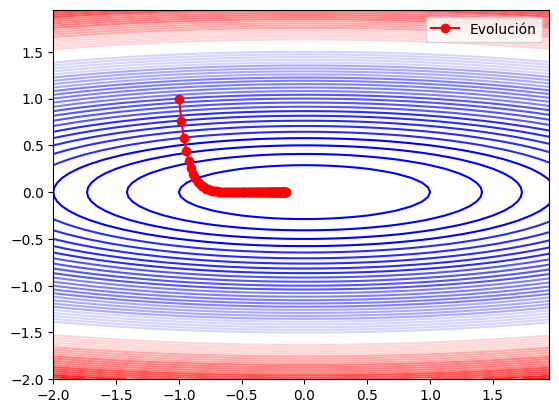

In [204]:
import matplotlib.pyplot as plt
# crear un grid bidimensional
x = np.arange(-2., 2., 0.05)
y = np.arange(-2., 2., 0.05)
yy = np.meshgrid(x, y)
#evaluar ff en el grid
h = f_ellipse(yy)
#dibujar las curvas de nivel
n_colors = 13
cMap = plt.cm.get_cmap("bwr",lut=n_colors )
_ = plt.contour(x, y, h, levels=range(60), cmap=cMap)

# CHAT GPT.
punto_inicial = np.array([-1,1])
_, evolucion, _ = grad_desc(punto_inicial, f_ellipse, g_ellipse) 
evolucion = np.array(evolucion)

plt.plot(evolucion[:, 0], evolucion[:, 1], marker='o', color='red', label='Evolución')
plt.legend()

## Rosen

C:\Users\juanj\AppData\Local\Temp\ipykernel_18772\187200388.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cMap = plt.cm.get_cmap("bwr", lut=n_colors)


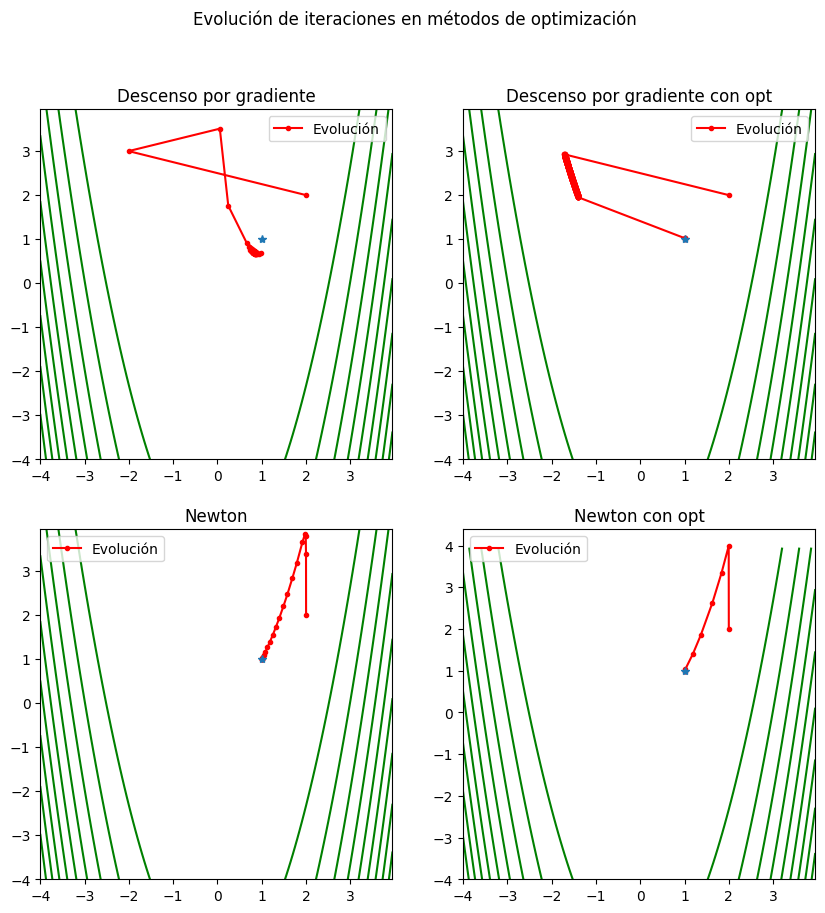

In [205]:
import matplotlib.pyplot as plt

# Configurar el gráfico
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Evolución de iteraciones en métodos de optimización')

# Métodos de optimización
metodos = ['Descenso por gradiente', 'Descenso por gradiente con opt', 'Newton', 'Newton con opt']
punto_inicial = np.array([2.0,2.0])
metodos_funciones = [grad_desc, grad_desc_ls, newton, newton_ls]

g_rosen= jacobian(f_rosen)
h_rosen=jacobian(g_rosen)
# Iterar sobre los subgráficos y métodos
for i, ax in enumerate(axes.flatten()):
    metodo = metodos[i]
    punto_inicial = punto_inicial
    metodo_funcion = metodos_funciones[i]

    x = np.arange(-4,4., 0.05)
    y = np.arange(-4., 4., 0.05)
    yy = np.meshgrid(x, y)

    h = f_rosen(yy)

    # Dibujar las curvas de nivel
    n_colors = 13
    cMap = plt.cm.get_cmap("bwr", lut=n_colors)
    

    if i == 0:
        # Sacas la evolución que va haciendo el punto.
        _, evolucion, _ = metodo_funcion(punto_inicial, f_rosen, g_rosen,lr_ini=0.0025)
    elif i == 1:
         _, evolucion, _ = metodo_funcion(punto_inicial, f_rosen, g_rosen,maxiter=1000)
    elif i ==2:
        _, evolucion, _ = metodo_funcion(punto_inicial, f_rosen, g_rosen, h_rosen, lr=0.7)
    else:
        _, evolucion, _ = metodo_funcion(punto_inicial, f_rosen, g_rosen, h_rosen, maxiter=1000)

    evolucion = np.array(evolucion)
    # Dibujar la evolución de las iteraciones
    _ = ax.contour(x, y, h, levels=10, colors = 'green')
    ax.plot(evolucion[:, 0], evolucion[:, 1], marker='.', color='red', label='Evolución')
    
    ax.set_title(metodo)
    ax.legend()

    ax.plot(1., 1., '*')
plt.show()

# Ellipse

C:\Users\juanj\AppData\Local\Temp\ipykernel_18772\3483401957.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cMap = plt.cm.get_cmap("bwr", lut=n_colors)


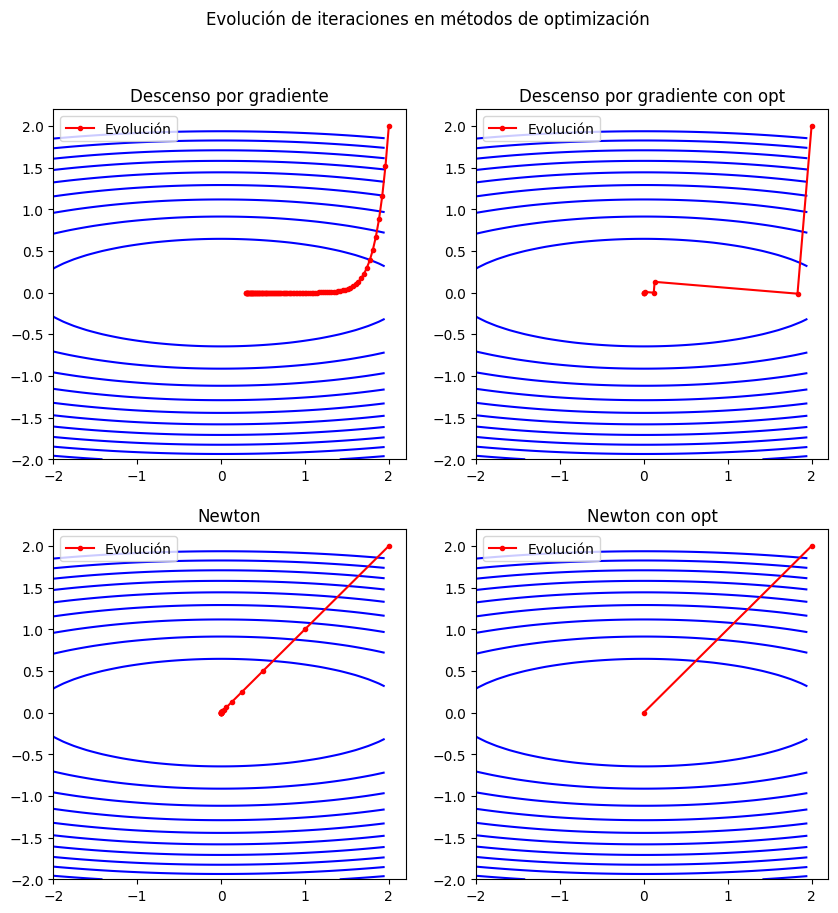

In [206]:
import matplotlib.pyplot as plt

def h_ellipse0(x: np.ndarray)-> np.ndarray:
    return np.array([[2, 0],[0, 24]])
g_ellipse=jacobian(f_ellipse)

h_ellipse= jacobian(g_ellipse)

# Configurar el gráfico
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Evolución de iteraciones en métodos de optimización')

# Métodos de optimización
metodos = ['Descenso por gradiente', 'Descenso por gradiente con opt', 'Newton', 'Newton con opt']
punto_inicial = np.array([2.,2.])
metodos_funciones = [grad_desc, grad_desc_ls, newton, newton_ls]

# Iterar sobre los subgráficos y métodos
for i, ax in enumerate(axes.flatten()):
    metodo = metodos[i]
    punto_inicial = punto_inicial
    metodo_funcion = metodos_funciones[i]

    x = np.arange(-2., 2., 0.05)
    y = np.arange(-2., 2., 0.05)
    yy = np.meshgrid(x, y)

    h = f_ellipse(yy)

    # Dibujar las curvas de nivel
    n_colors = 13
    cMap = plt.cm.get_cmap("bwr", lut=n_colors)
    _ = ax.contour(x, y, h, levels=10,colors='blue')

    if i == 0 or i == 1:
        # Sacas la evolución que va haciendo el punto.
        _, evolucion, _ = metodo_funcion(punto_inicial, f_ellipse, g_ellipse)
    elif i ==2:
        _, evolucion, _ = metodo_funcion(punto_inicial, f_ellipse, g_ellipse, h_ellipse, lr=0.5)
    else:
        _, evolucion, _ = metodo_funcion(punto_inicial, f_ellipse, g_ellipse, h_ellipse)

    evolucion = np.array(evolucion)
    # Dibujar la evolución de las iteraciones
    ax.plot(evolucion[:, 0], evolucion[:, 1], marker='.', color='red', label='Evolución')
    
    ax.set_title(metodo)
    ax.legend()

plt.show()


In [207]:

def f_ellipse(x: np.ndarray)-> float:
    return x[0]**2+12.*x[1]**2

x=np.array([0.,0.])
g_ellipse(x)

array([0., 0.])

# II-A. Implementando nuestro minimize

In [210]:
#opt = {'gtol': tol}
#hacer el jacobiano de una funcion -> gradiente
#hacer el jacobiano del gradiente -> matriz hessiana
import scipy
from autograd import jacobian

def f_rosen_md(z: np.ndarray)-> float:
    # número de variables tenemos
    n = len(z)
    suma = 0
    for i in range(n):
        suma += 100 * (z[i + 1] - z[i]**2)**2 + (1 - z[i])**2

    return suma

l_x = []
def save_x(x: np.ndarray):
    global l_x
    l_x.append(x)

# PONER CALLBACK ANTES PQ NO TIENE VALOR POR DEFECTO.
def my_minimize(fun: Callable, x0: np.ndarray, method= 'BFGS', tol=1.e-4, callback=save_x) -> scipy.optimize._optimize.OptimizeResult:
    '''
    Summary:
        Usamos la función scipy.optimize.minimize para obtener una aproximación del mínimo de nuestra función. Minimize recibe un diccionario donde le indicamos el número máximo de iteraciones,
        un punto inicial, la función , un método para optimizar y una función de devolución de llamda. Esta puede o no recibir un jacobiano,
        solo lo recibirá si el método especificado como parámetro es CG,BFGS o L-BFGS-B. Devolvemos un objeto 'Optimize Result'.
    Args:
        -fun(callable): función a minimizar
        -x0(np.array(float,float): punto inicial
        -method: método a usar en minimize
        -tol(float): tolerancia 
        -callback(callable): en cada iteración de optimize.minimize se llama a la función callback,
        usaremos save_x para recoger la posición de los puntos calculados
    Returns:
        scipy.optimize.minimize(fun, x0, jac=jacobiano, method=method, options=opt, callback=callback) scipy.optimize._optimize.OptimizeResult
        -scipy.optimize.minimize(fun, x0, jac=jacobiano, method=method, options=opt, callback=callback): Esta función a su vez devuelve varias cosas:
            -success(Bool):informa sobre si se ha logrado ejecutar con éxito
            -status(int): informa sobre si se ha logrado ejecutar con éxito, puede ser 0 o 1
            -fun(float):valor óptimo de la función objetivo
            -x(np.array(float,float)):aproximación conseguida del mínimo de la función
            -nit(int): número de iteraciones
            -jac(np.array(float,float)): jacobiano o gradiente de la función
            -hess_inv(np.array):inversa del hessiano
            -nfev(int):número de evaluaciones de la función
            -njev(int): número de evaluaciones del jacobiano
            
        
    '''
    opt = {'gtol': tol}
    if method not in  ['CG', 'BFGS', 'L-BFGS-B']:
        jacobiano = None

    else:
        jacobiano = jacobian(fun)

    print(type(scipy.optimize.minimize(fun, x0, jac=jacobiano, method=method, options=opt, callback=callback)))
    return scipy.optimize.minimize(fun, x0, jac=jacobiano, method=method, options=opt, callback=callback)

punto_inicial = np.array([2.0,2.0])
my_minimize(f_rosen, punto_inicial)

<class 'scipy.optimize._optimize.OptimizeResult'>


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 7.767468364201008e-12
        x: [ 1.000e+00  1.000e+00]
      nit: 29
      jac: [-8.211e-05  3.907e-05]
 hess_inv: [[ 5.018e-01  1.002e+00]
            [ 1.002e+00  2.006e+00]]
     nfev: 34
     njev: 34

#   Cuestiones


C:\Users\juanj\AppData\Local\Temp\ipykernel_18772\3162537454.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cMap = plt.cm.get_cmap("bwr", lut=n_colors)
C:\Users\juanj\AppData\Local\Temp\ipykernel_18772\3162537454.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cMap = plt.cm.get_cmap("bwr", lut=n_colors)


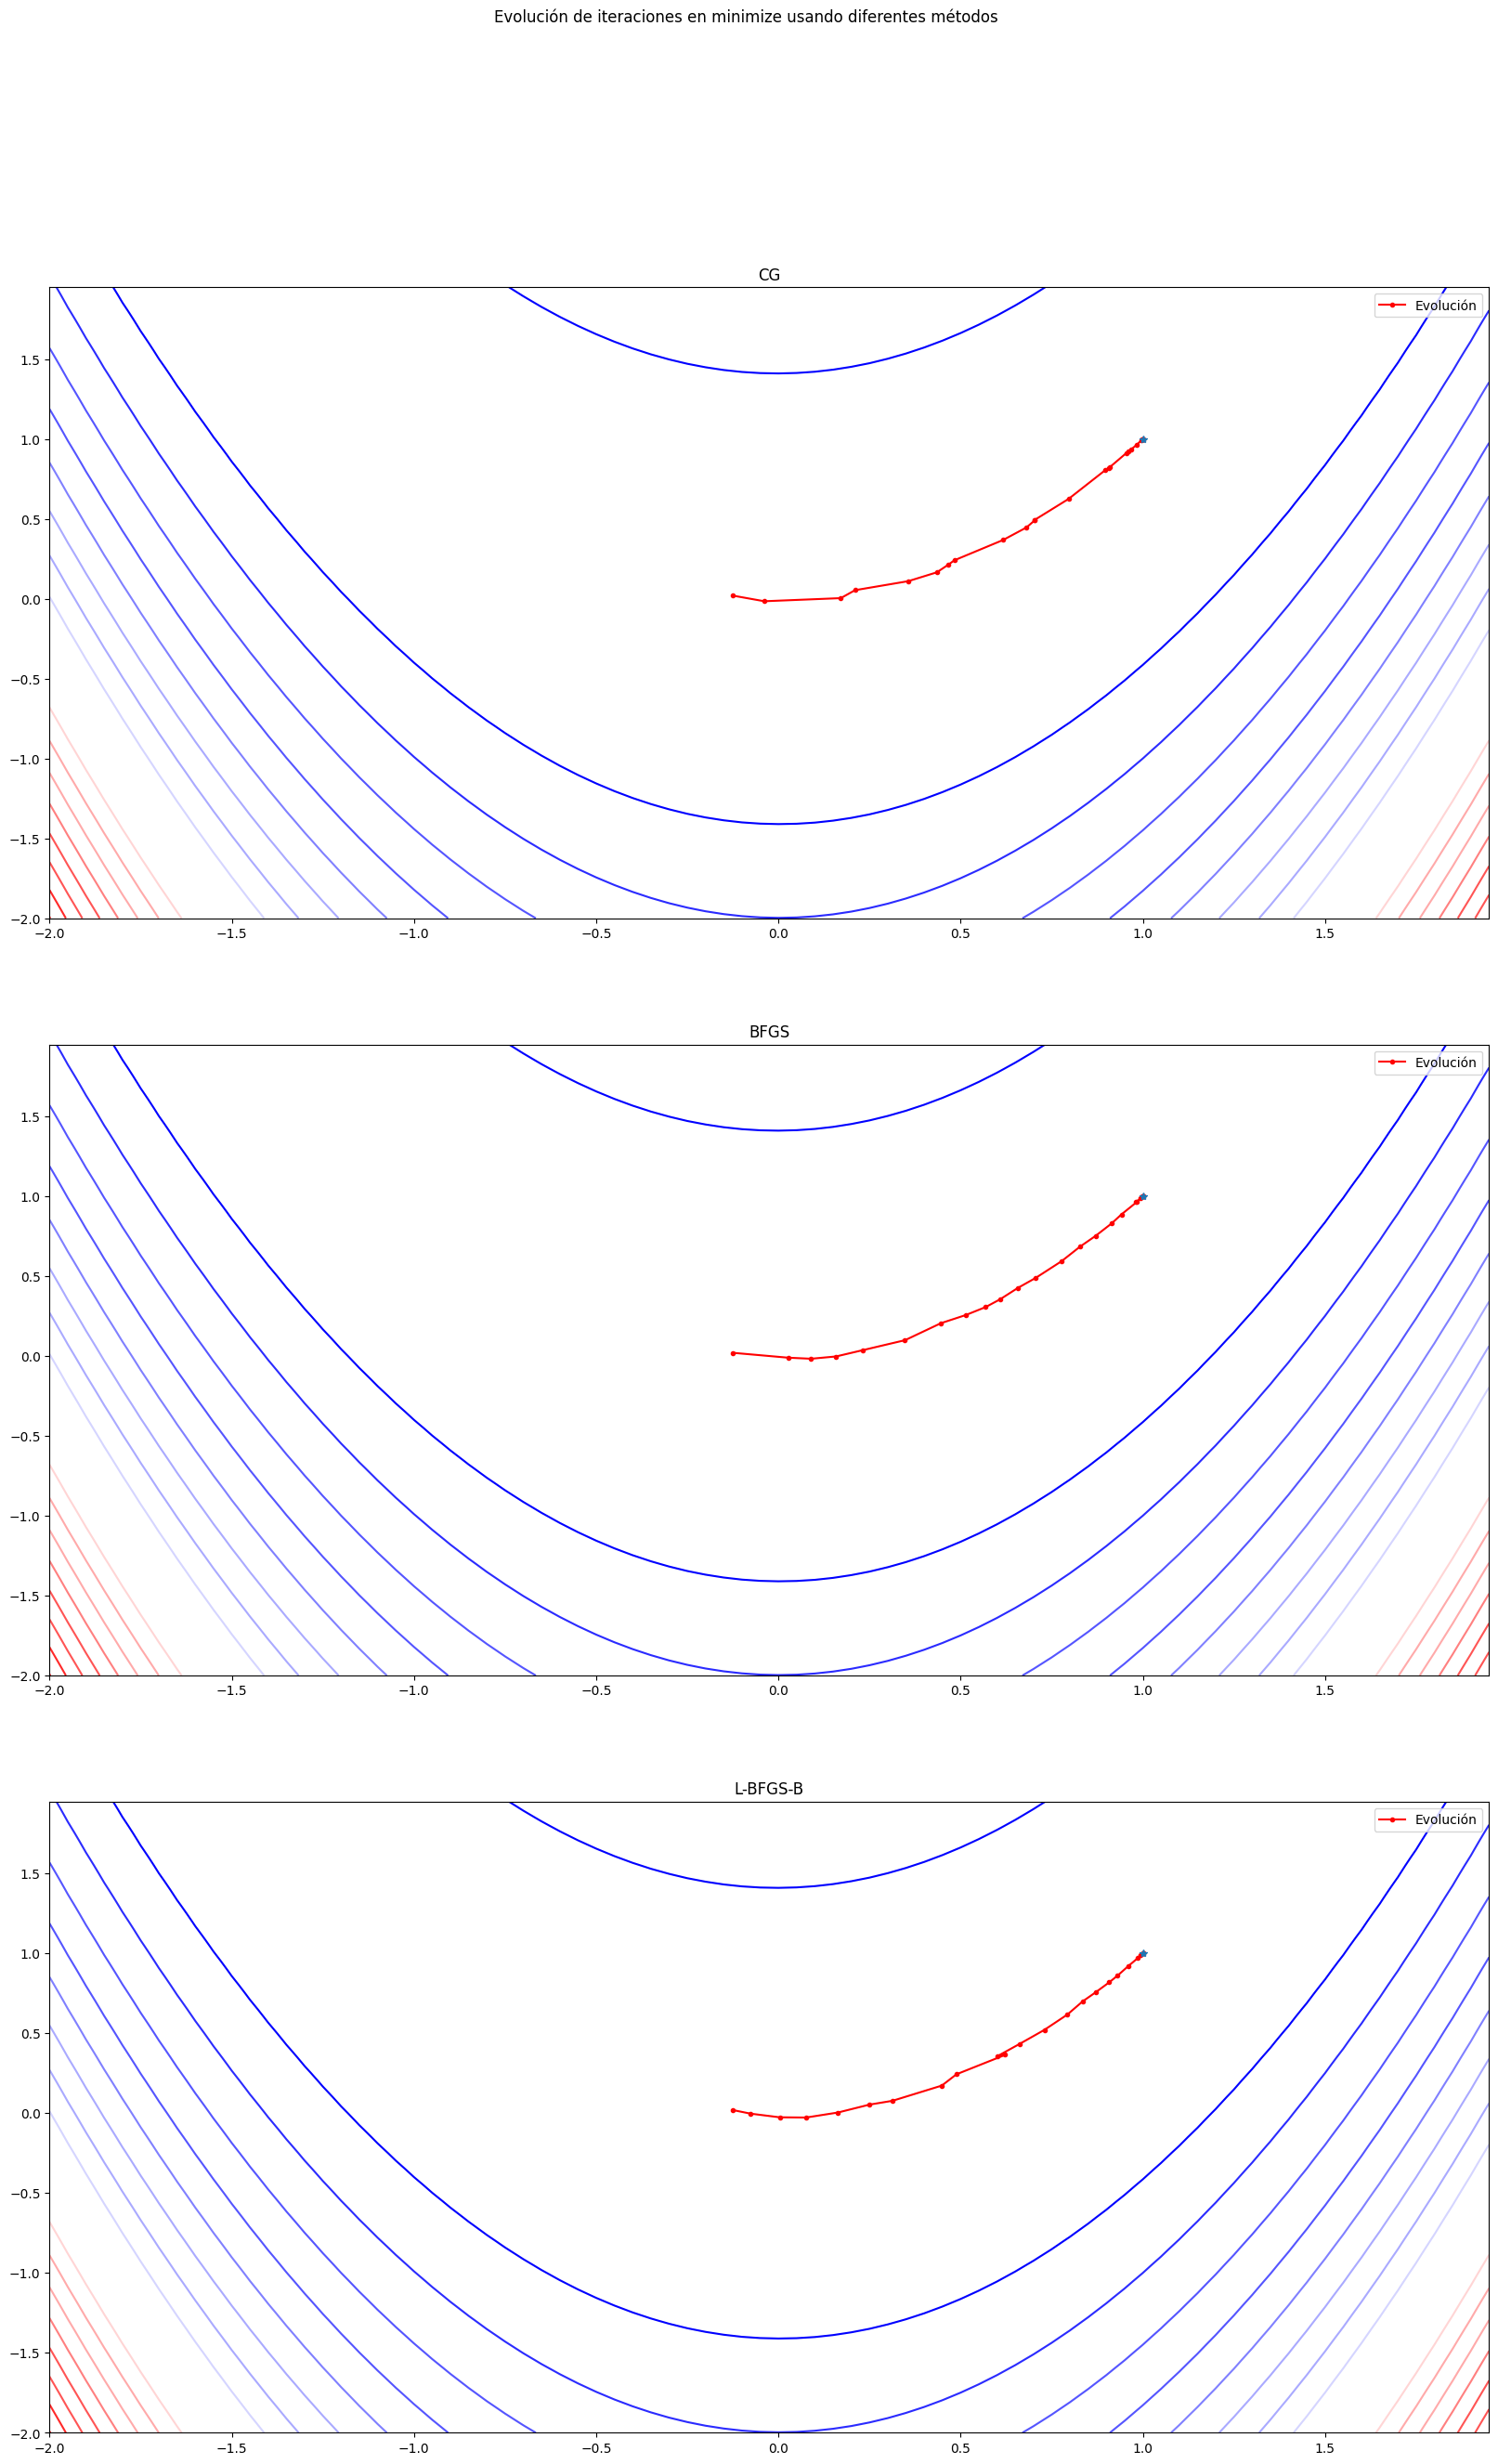

In [ ]:
import matplotlib.pyplot as plt

# Configurar el gráfico
fig, axes = plt.subplots(3, 1, figsize=(20, 30))
fig.suptitle('Evolución de iteraciones en minimize usando diferentes métodos')

# Métodos de optimización
metodos = ['CG', 'BFGS', 'L-BFGS-B']
punto_inicial = np.array([-0.1,0.2])

# Iterar sobre los subgráficos y métodos
for i, ax in enumerate(axes.flatten()):
    if i == 3:
        break
    metodo = metodos[i]

    x = np.arange(-2., 2., 0.05)
    y = np.arange(-2., 2., 0.05)
    yy = np.meshgrid(x, y)

    h = f_rosen(yy)

    # Dibujar las curvas de nivel
    n_colors = 13
    cMap = plt.cm.get_cmap("bwr", lut=n_colors)
    _ = ax.contour(x, y, h, levels=20, cmap=cMap)

    l_x = []
    my_minimize(f_rosen, punto_inicial, method=metodo)

    l_x = np.array(l_x)
    # Dibujar la evolución de las iteraciones
    ax.plot(l_x[:, 0], l_x[:, 1], marker='.', color='red', label='Evolución')
    ax.plot(1,1,'*')
    ax.set_title(metodo)
    ax.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'tiempo de ejecución')

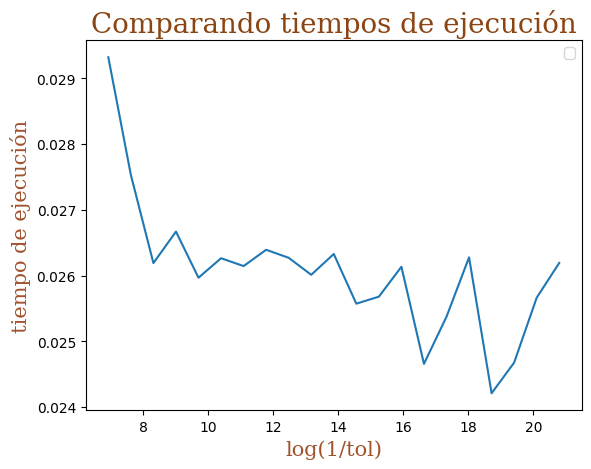

In [ ]:
import scipy.optimize  ##CELDA MALA
import numpy as np
tolerancia = np.array([2**k for k in range(-30, -9)])
tolerancia_2 = np.array([np.log(1/(2**k)) for k in range(-30, -9)])
min_bra = (-3, 1.0, 3)
def array_xtol_tiempos1(met):
    l_timings = []

    for tolerancia in [2**k for k in range(-30, -9)]:
        # -n 10 -r 5 especifican que se debe ejecutar la operación 10 veces en cada iteración y repetir este proceso 5 veces para obtener estadísticas confiables
        # El modificador -o se utiliza para almacenar el resultado del temporizador en la variable timings.
        global l_x 
        l_x = []
        timings = %timeit -o -n 10 -r 5 -q my_minimize(f_rosen, save_x, punto_inicial, method = met)
        l_timings.append(timings.best)
    return np.array(l_timings)

CG_Tim = array_xtol_tiempos1('CG')
BFGS_Tim = array_xtol_tiempos1('BFGS')
LBFGSB_Tim = array_xtol_tiempos1('L-BFGS-B')

plt.plot(tolerancia_2, CG_Tim)
#plt.plot()

plt.legend()
font1 = {'family':'serif','color':'saddlebrown','size':20}
font2 = {'family':'serif','color':'sienna','size':15}

plt.title('Comparando tiempos de ejecución', fontdict = font1)
plt.xlabel('log(1/tol)', fontdict = font2)
plt.ylabel('tiempo de ejecución', fontdict = font2)

In [ ]:
import scipy.optimize
import numpy as np
tolerancia = np.array([2**k for k in range(-30, -9)])
min_bra = (-3, 1.0, 3)
def array_xtol_tiempos1(met):
    l_timings = []

    for tolerancia in [2**k for k in range(-28, -9)]:
        # -n 10 -r 5 especifican que se debe ejecutar la operación 10 veces en cada iteración y repetir este proceso 5 veces para obtener estadísticas confiables
        # El modificador -o se utiliza para almacenar el resultado del temporizador en la variable timings.
        global l_x 
        l_x = []
        timings = %timeit -o -n 10 -r 5 -q my_minimize(f_rosen, save_x, punto_inicial, method = met)
        l_timings.append(timings.best)
    return np.array(l_timings)

CG_Tim = array_xtol_tiempos1('CG')
BFGS_Tim = array_xtol_tiempos1('BFGS')
LBFGSB_Tim = array_xtol_tiempos1('L-BFGS-B')

plt.plot(tolerancia, CG_Tim)
#plt.plot()

plt.legend()
font1 = {'family':'serif','color':'saddlebrown','size':20}
font2 = {'family':'serif','color':'sienna','size':15}

plt.title('Comparando tiempos de ejecución', fontdict = font1)
plt.xlabel('tol', fontdict = font2)
plt.ylabel('tiempo de ejecución', fontdict = font2)

TypeError: my_minimize() got multiple values for argument 'method'

In [ ]:
import scipy.optimize  #CELDA BUENA
import numpy as np
tolerancia = np.array([2**k for k in range( -30,-8)])

min_bra = (-3, 1.0, 3)
punto_inicial = np.array([2.,2.])
def array_xtol_tiempos1(met):
    l_timings = []

    for element in tolerancia:
        # -n 10 -r 5 especifican que se debe ejecutar la operación 10 veces en cada iteración y repetir este proceso 5 veces para obtener estadísticas confiables
        # El modificador -o se utiliza para almacenar el resultado del temporizador en la variable timings.
        global l_x 
        l_x = []
        timings = %timeit -o -n 10 -r 5 -q my_minimize(f_rosen, punto_inicial, method = met)
        l_timings.append(timings.best)
    return np.array(l_timings)

CG_Tim = array_xtol_tiempos1('CG')
BFGS_Tim = array_xtol_tiempos1('BFGS')
LBFGSB_Tim = array_xtol_tiempos1('L-BFGS-B')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'tiempo de ejecución')

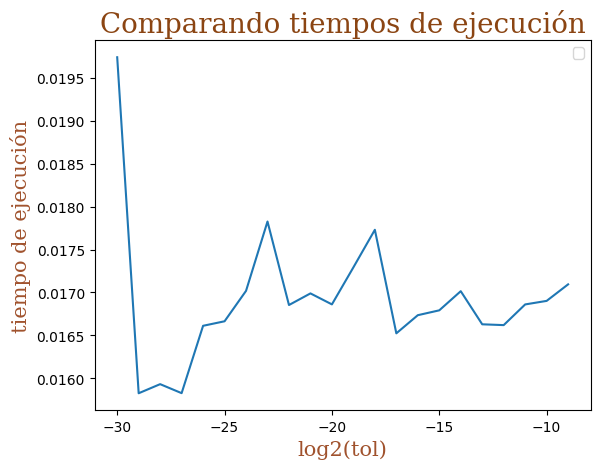

In [ ]:

plt.plot(np.log2(tolerancia), CG_Tim)#poner '.'
#plt.plot(tolerancia,  BFGS_Tim, '2')
#plt.plot(tolerancia, LBFGSB_Tim, '3')
#plt.plot()

plt.legend()
font1 = {'family':'serif','color':'saddlebrown','size':20}
font2 = {'family':'serif','color':'sienna','size':15}

plt.title('Comparando tiempos de ejecución', fontdict = font1)
plt.xlabel('log2(tol)', fontdict = font2)
plt.ylabel('tiempo de ejecución', fontdict = font2)

In [ ]:
print(tolerancia)

[9.31322575e-10 1.86264515e-09 3.72529030e-09 7.45058060e-09
 1.49011612e-08 2.98023224e-08 5.96046448e-08 1.19209290e-07
 2.38418579e-07 4.76837158e-07 9.53674316e-07 1.90734863e-06
 3.81469727e-06 7.62939453e-06 1.52587891e-05 3.05175781e-05
 6.10351562e-05 1.22070312e-04 2.44140625e-04 4.88281250e-04
 9.76562500e-04]


In [ ]:
CG_Tim

array([0.02364138, 0.02318155, 0.02360633, 0.02244793, 0.02319374,
       0.03016075, 0.03023382, 0.025048  , 0.02386722, 0.02523867,
       0.02371326, 0.03491333, 0.02403831, 0.02387588, 0.0250131 ,
       0.0249064 , 0.03022863, 0.02525028, 0.02528043, 0.0244608 ,
       0.0240588 ])